In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier


In [185]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [186]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [187]:
# Drop the index column
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [188]:
# Strip whitespaces in the column names
df.columns = df.columns.str.strip()
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [190]:
# There are somany rows with NaN in Savings and Checking accounts
# It is better to remove them as we just can't simply replace them with mode or something


In [191]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [192]:
df.describe(include="all")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [193]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [194]:
df.duplicated().sum() # Hence no duplicated rows

np.int64(0)

In [195]:
df = df.dropna().reset_index(drop=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


In [196]:
# We dropped 488 rows
len(df["Housing"].unique())

3

In [197]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [198]:
def find_categorical_columns(df):
    return [col for col in df.columns if type(df[col]) in ["object"] or len(df[col].unique()) <20]

In [199]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [200]:
categorical_columns = find_categorical_columns(df)
categorical_columns.remove("Risk") # Remember to remove your target column else will cause data leakage
categorical_columns

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [201]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]
# numerical_columns = numerical_columns.remove("Risk")
numerical_columns

['Age', 'Credit amount', 'Duration', 'Risk']

In [202]:
# Currenlty numerical_columns inlcudes the target column 'Risk'. Hence we need to remove it
numerical_columns.remove("Risk")
numerical_columns

['Age', 'Credit amount', 'Duration']

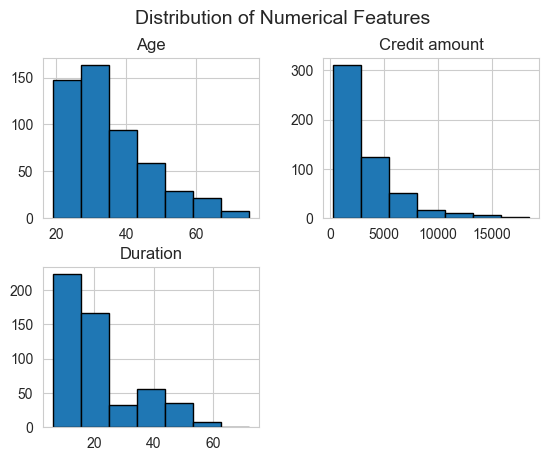

In [203]:
df[numerical_columns].hist(bins=7, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

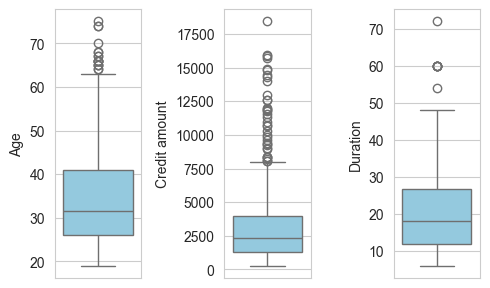

In [204]:
plt.figure(figsize=(5,3))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color="skyblue")
    
plt.tight_layout()
plt.show()

In [205]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [206]:
# Categorical Columns
categorical_columns 


['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\967829330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts().index)
C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\967829330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts().index)
C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\967829330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_co

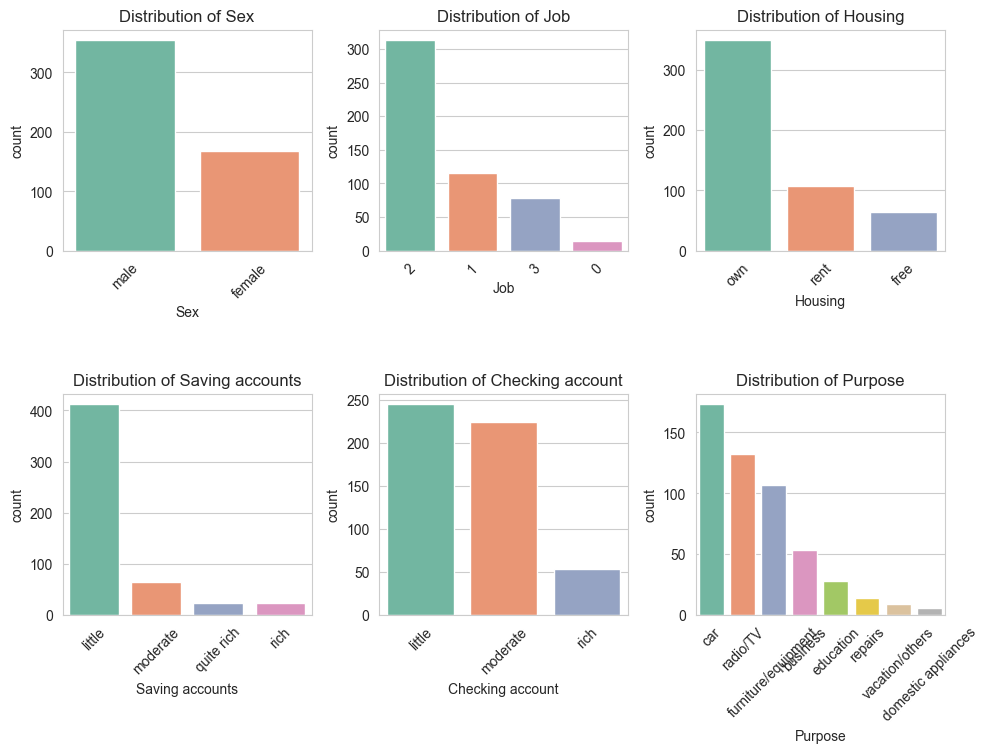

In [207]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette="Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [208]:
# Correlation matrix
corr = df[numerical_columns].corr()
corr

,Age,Credit amount,Duration
Age,1.000000,0.082014,0.001549
Credit amount,0.082014,1.000000,0.613298
Duration,0.001549,0.613298,1.000000


In [209]:
numerical_columns

['Age', 'Credit amount', 'Duration']

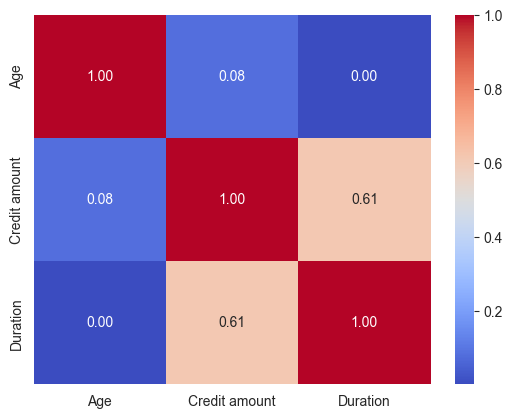

In [210]:
# Visualizing a HeatMap for the numerical columns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [211]:
# Hence there is no major correlation except for Credit Amount and Duration

In [212]:
# Combining categorical and numerical columns
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [213]:
df.groupby("Job")["Credit amount"].mean() # As you see here that the credit amount is more for jobs 0 < 1 < 2 < 3

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [214]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


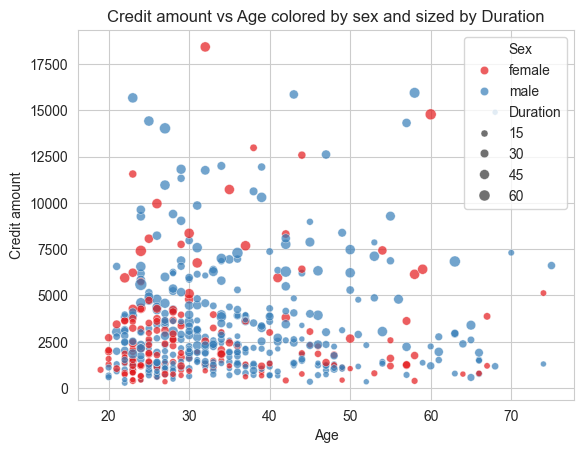

In [215]:
# Scatter plot
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit amount vs Age colored by sex and sized by Duration")
plt.show()

C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\281862245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")


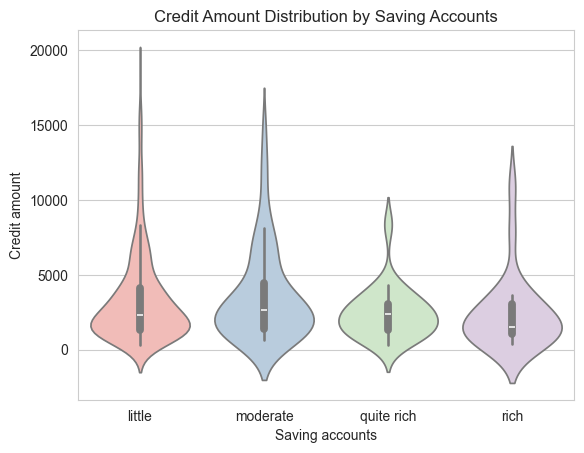

In [216]:
# Violin Plot
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [217]:
# Some analysis for risk
df["Risk"].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\4024506209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y=col, palette="Pastel2")
C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\4024506209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y=col, palette="Pastel2")
C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\4024506209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y=col, palette="Pastel2")


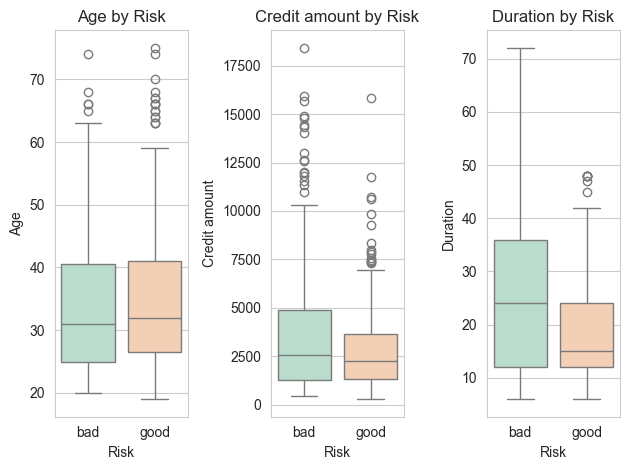

In [218]:
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x="Risk", y=col, palette="Pastel2")
    plt.title(f"{col} by Risk")
    
plt.tight_layout()
plt.show()

In [219]:
# As you see, there is no relation between Age and Risk
# But there is a correlation as the Credit Amount increases, the "bad" Risk also increases
# Also for Duration and Risk, as the Duration increases, "bad" risk also increases

In [220]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [221]:
# Hence this clearly says there is no correlation between Age and Risk 
# While there is a significant amount of correlation between Credit amount vs Age and Duration Vs Risk
# i.e More the Duration, badder or higher the risk
# i.e More the Credit amount, badder or higher the risk

In [222]:
categorical_columns

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

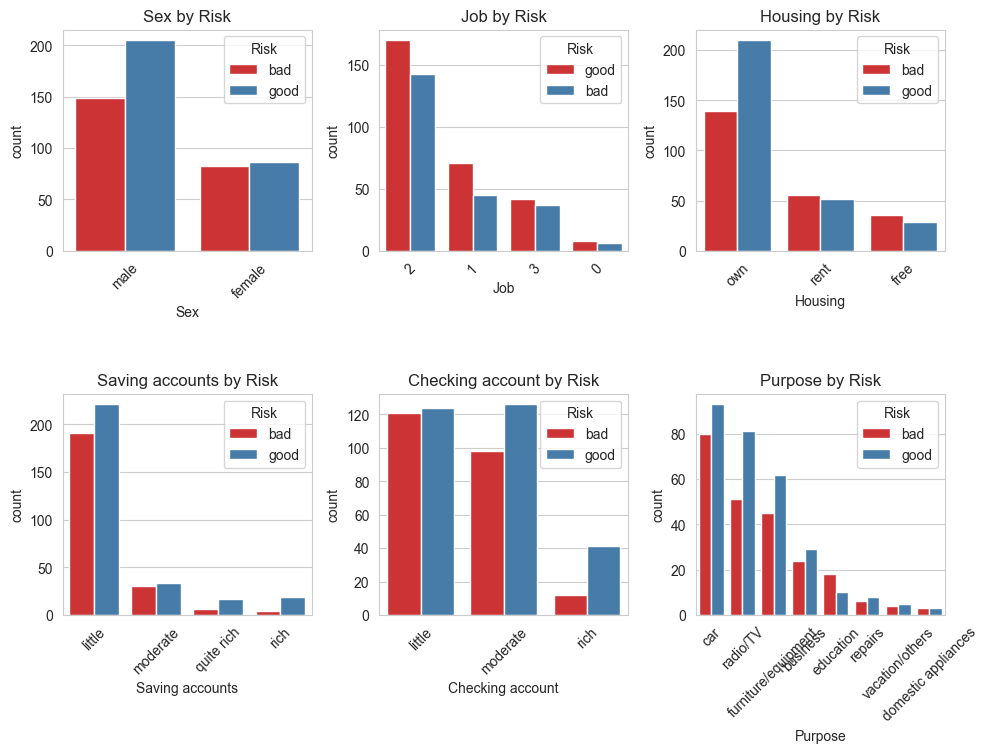

In [223]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order=df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [224]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


In [225]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [226]:
features = df.columns
features = list(features)
features.remove("Purpose")
features.remove("Risk")
features

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration']

In [227]:
target = "Risk"

In [228]:
df_model = df[features + [target]].copy()
df_model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad
...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,good
518,30,male,3,own,little,little,3959,36,good
519,40,male,3,own,little,little,3857,30,good
520,23,male,2,free,little,little,1845,45,bad


In [229]:
# Label Encoding the categorical Variables
from sklearn.preprocessing import LabelEncoder
import joblib
# Use label encoder here as the categorical variables/columns are ordinal in nature
# i.e they follow some sort of order

In [230]:
categorical_columns = df_model.select_dtypes(include="object").columns.drop("Risk")
categorical_columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [231]:
encoded_dictionary = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoded_dictionary[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [232]:
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target])

In [233]:
df_model[target].value_counts() # Hence the target column in label encoded

Risk
1    291
0    231
Name: count, dtype: int64

In [234]:
joblib.dump(le_target, "target_column.pkl")

['target_column.pkl']

In [235]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [237]:
X = df_model.drop(columns=[target])
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30


In [238]:
X.shape

(522, 8)

In [239]:
Y = df_model[target]
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: Risk, dtype: int64

In [240]:
Y = Y.replace()

C:\Users\Monish D\AppData\Local\Temp\ipykernel_30040\456131950.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  Y = Y.replace()


In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify=Y)
# stratify=y in train_test_split ensures that the class distribution of the target variable y is preserved in both the training and test sets.

In [242]:
X_train.shape

(417, 8)

In [243]:
Y_test.shape

(105,)

In [244]:
# Importing models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [245]:
# Making a function that will return you the best model after grid search CV
def best_grid_model(model, Xf, Yf, model_param, scoring="f1"):
    x_train, x_test, y_train, y_test = train_test_split(Xf, Yf, test_size=0.2, random_state=42, stratify=Yf)
    grid = GridSearchCV(estimator=model,param_grid=model_param, scoring=scoring, cv=10, n_jobs=-1, verbose=1)
    grid.fit(x_train, y_train)
    y_pred=grid.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    return grid.best_estimator_, grid.best_params_, score 

In [254]:
# All the hyperparameters of all the models above
dtc_params = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

rfc_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

extra_trees_params = {
    "n_estimators": [100, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]
}

xgboost_params = {
    "n_estimators": [100, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "max_depth": [3, 5, 7, 10],
    "colsample_bytree": [0.7, 1]
}

svm_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "degree": [2, 3, 4]
    }


In [ ]:
# Dictionary of model
models = {
    "Decision Tree Classifier": [DecisionTreeClassifier(random_state=42, class_weight="balanced"),dtc_params],
    "Random Forest Classifier": [RandomForestClassifier(random_state=42, class_weight="balanced"),rfc_params],
    "Extra Trees Classifier": [ExtraTreesClassifier(random_state=42, class_weight="balanced"),extra_trees_params],
    "XGBoost Classifier": [XGBClassifier(random_state=42, class_weight="balanced"),xgboost_params],
    "Support Vector Machine": [SVC(random_state=42, class_weight="balanced"), svm_params]
}

In [248]:
# Evaluation of all the models with all their best_estimators(models)

def evaluation_of_models(models_dict):
    for model_name, (model, model_params) in models_dict.items():
        print(f"{model_name} Training")
        best_model, best_params, score = best_grid_model(model, X_train, Y_train, model_params, scoring="f1")
        print(f"Accuracy Score: {score}")
        models_dict[model_name] = [best_model, dict(best_params)]
        
        
        
        
        
        # best_grid_model(model, X, Y, model_param, scoring="acc")
        # return grid.best_estimator_, grid.best_params_, score 

In [249]:
evaluation_of_models(models)

Decision Tree Classifier Training
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Accuracy Score: 0.6071428571428571
Random Forest Classifier Training
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Accuracy Score: 0.6547619047619048
Extra Trees Classifier Training
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Accuracy Score: 0.6785714285714286
XGBoost Classifier Training
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Accuracy Score: 0.5595238095238095
Support Vector Machine Training
Fitting 10 folds for each of 225 candidates, totalling 2250 fits


KeyboardInterrupt: 

In [251]:
models["Random Forest Classifier"] # Prints the best model of Random Forest Classifier

[RandomForestClassifier(max_depth=10, min_samples_split=5),
 {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100}]

In [257]:
# So far Extra Trees Classifier has the highest Accuracy
# 0.6785714285714286
models["Extra Trees Classifier"][0]

ExtraTreesClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)

In [258]:
best_model = models["Extra Trees Classifier"][0]

In [260]:
# Making a pickle file for the extra tree classifier
joblib.dump(best_model, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']

In [263]:
df["Checking account"].unique()

array(['moderate', 'little', 'rich'], dtype=object)

In [264]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')